In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_pr = pd.read_csv("FINAL.csv")
df_pr.head()

,Year,Region,Estimated Population nr,Nr of Persons with Internet Access,% of Persons with Internet Access
0,2011,Border,784000.0,517440.0,66.0
1,2011,Dublin,2523000.0,2119320.0,84.0
2,2011,Ireland,9149700.0,7136766.0,78.0
3,2011,Mid-East,1314900.0,1143963.0,87.0
4,2011,Mid-West,933600.0,718872.0,77.0


In [78]:
unique_region_names = set(df_pr['Region'])
years_to_predict = np.array([2023, 2024, 2025, 2026, 2027, 2028])

In [35]:
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
model_list = [linear,ridge,lasso]

In [36]:
data=[]

for region in unique_region_names:
    
    df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)

    X = df_pred[['Year','Estimated Population nr']]
    y = df_pred['Nr of Persons with Internet Access']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

    for model in model_list:
        model.fit(X_train, y_train)
        score = cross_val_score(model, X, y,cv=5).max()
        row = [region, score,model]
        data.append(row)
pred_df1 = pd.DataFrame(data, columns = ['Region','Score','Model'])
data = []
for region in unique_region_names:
    df_3 = pred_df1.drop(pred_df1[(pred_df1["Region"] != region) ].index)
    maximum = df_3["Score"].idxmax()
    score_max = df_3.loc[maximum, 'Score']
    model = df_3.loc[maximum, 'Model']
    row = [region, score_max,model]
    data.append(row)
pred_df3 = pd.DataFrame(data, columns = ['Region','Score','Model'])

In [37]:
pred_df3

,Region,Score,Model
0,Dublin,0.998062,Lasso()
1,Ireland,0.971619,Ridge()
2,Mid-East,0.932612,Ridge()
3,Mid-West,0.796682,LinearRegression()
4,Midlands,0.996824,LinearRegression()
5,Border,0.900159,LinearRegression()
6,South-East,0.937257,Ridge()
7,West,0.244942,Lasso()
8,South-West,0.896263,Ridge()


In [14]:
region_name = ['West']

In [48]:
data = []
for region in region_name:    
    df_GS = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)
    X = df_pred[['Year','Estimated Population nr']]
    y = df_pred['Nr of Persons with Internet Access']   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

    clf = GridSearchCV(lasso, {
        'alpha': [10,100,1000,10000,1000000]
    }, cv=4, return_train_score=False)
    clf.fit(X, y)
    best_params = clf.best_params_
    best_score = clf.best_score_
    row = [region,best_params, best_score]
    data.append(row)    
    df_GSr = pd.DataFrame(data, columns = ['Region','best_params','Score'])
df_GSr

,Region,best_params,Score
0,West,{'alpha': 1000000},-1.036847


In [51]:
lasso100 = Lasso(alpha = 1000000)
model_list = [lasso100]

In [52]:
data=[]

for region in region_name:
    df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)

    X = df_pred[['Year','Estimated Population nr']]
    y = df_pred['Nr of Persons with Internet Access']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

    for model in model_list:
        model.fit(X_train, y_train)
        score = cross_val_score(model, X, y,cv=5).max()
        row = [region, score,model]
        data.append(row)
pred_df1 = pd.DataFrame(data, columns = ['Region','Score','Model'])
data = []
for region in region_name:
    df_3 = pred_df1.drop(pred_df1[(pred_df1["Region"] != region) ].index)
    maximum = df_3["Score"].idxmax()
    score_max = df_3.loc[maximum, 'Score']
    model = df_3.loc[maximum, 'Model']
    row = [region, score_max,model]
    data.append(row)
pred_df3 = pd.DataFrame(data, columns = ['Region','Score','Model'])
pred_df3.Score.mean()

0.30642434337322877

In [53]:
pred_df3

,Region,Score,Model
0,West,0.306424,Lasso(alpha=1000000)


In [65]:
dfe = pd.read_csv("dfe.csv")
dfe.describe()

,Year,Predicted Estimated Population nr
count,99.000000,9.900000e+01
mean,2028.000000,2.420821e+06
std,3.178371,3.099649e+06
min,2023.000000,6.407404e+05
25%,2025.000000,9.369980e+05
50%,2028.000000,1.045775e+06
75%,2031.000000,1.705744e+06
max,2033.000000,1.145282e+07


In [79]:
#For Dublin using lasso with default parameters
data=[]
region = 'Dublin'
df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)
X = df_pred[['Year','Estimated Population nr']]
y = df_pred['Nr of Persons with Internet Access']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
lasso.fit(X_train, y_train)
for year in years_to_predict:
    e_population = dfe.loc[(dfe.Year == year) & (dfe.Region == region),'Predicted Estimated Population nr'].iloc[0]
    p = lasso.predict([[year,e_population]])
    prediction = round(p.item(),2)
    row = [year, region, prediction]
    data.append(row)

df_final = pd.DataFrame(data, columns=['Year', 'Region','Predicted Nr of Persons with Internet Access'])

In [80]:
#For Ireland using ridge with default parameters
data=[]
region = 'Ireland'
df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)
X = df_pred[['Year','Estimated Population nr']]
y = df_pred['Nr of Persons with Internet Access']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
ridge.fit(X_train, y_train)
for year in years_to_predict:
    e_population = dfe.loc[(dfe.Year == year) & (dfe.Region == region),'Predicted Estimated Population nr'].iloc[0]
    p = ridge.predict([[year,e_population]])
    prediction = round(p.item(),2)
    row = [year, region, prediction]
    data.append(row)

pred_ireland = pd.DataFrame(data, columns=['Year', 'Region','Predicted Nr of Persons with Internet Access'])    
df_final = pd.concat([df_final,pred_ireland],ignore_index=True)

#For Mid-East using ridge with default parameters
data=[]
region = 'Mid-East'
df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)
X = df_pred[['Year','Estimated Population nr']]
y = df_pred['Nr of Persons with Internet Access']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
ridge.fit(X_train, y_train)
for year in years_to_predict:
    e_population = dfe.loc[(dfe.Year == year) & (dfe.Region == region),'Predicted Estimated Population nr'].iloc[0]
    p = ridge.predict([[year,e_population]])
    prediction = round(p.item(),2)
    row = [year, region, prediction]
    data.append(row)
    
pred_mid_east = pd.DataFrame(data, columns=['Year', 'Region','Predicted Nr of Persons with Internet Access'])    
df_final = pd.concat([df_final,pred_mid_east],ignore_index=True) 


#For South-East using ridge with default parameters
data=[]
region = 'South-East'
df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)
X = df_pred[['Year','Estimated Population nr']]
y = df_pred['Nr of Persons with Internet Access']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
ridge.fit(X_train, y_train)
for year in years_to_predict:
    e_population = dfe.loc[(dfe.Year == year) & (dfe.Region == region),'Predicted Estimated Population nr'].iloc[0]
    p = ridge.predict([[year,e_population]])
    prediction = round(p.item(),2)
    row = [year, region, prediction]
    data.append(row)
pred_south_east = pd.DataFrame(data, columns=['Year', 'Region','Predicted Nr of Persons with Internet Access'])    
df_final = pd.concat([df_final,pred_south_east],ignore_index=True)
    
#For South-West using ridge with default parameters    
data=[]
region = 'South-West'
df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)
X = df_pred[['Year','Estimated Population nr']]
y = df_pred['Nr of Persons with Internet Access']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
ridge.fit(X_train, y_train)
for year in years_to_predict:
    e_population = dfe.loc[(dfe.Year == year) & (dfe.Region == region),'Predicted Estimated Population nr'].iloc[0]
    p = ridge.predict([[year,e_population]])
    prediction = round(p.item(),2)
    row = [year, region, prediction]
    data.append(row)
pred_south_west = pd.DataFrame(data, columns=['Year', 'Region','Predicted Nr of Persons with Internet Access'])    
df_final = pd.concat([df_final,pred_south_west],ignore_index=True)
    
#For Mid-West using linear regression
data=[]
region = 'Mid-West'
df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)
X = df_pred[['Year','Estimated Population nr']]
y = df_pred['Nr of Persons with Internet Access']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
linear.fit(X_train, y_train)
for year in years_to_predict:
    e_population = dfe.loc[(dfe.Year == year) & (dfe.Region == region),'Predicted Estimated Population nr'].iloc[0]
    p = linear.predict([[year,e_population]])
    prediction = round(p.item(),2)
    row = [year, region, prediction]
    data.append(row)
pred_mid_west = pd.DataFrame(data, columns=['Year', 'Region','Predicted Nr of Persons with Internet Access'])    
df_final = pd.concat([df_final,pred_mid_west],ignore_index=True)
    
#For Midlands using linear regression      
data=[]
region = 'Midlands'
df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)
X = df_pred[['Year','Estimated Population nr']]
y = df_pred['Nr of Persons with Internet Access']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
linear.fit(X_train, y_train)
for year in years_to_predict:
    e_population = dfe.loc[(dfe.Year == year) & (dfe.Region == region),'Predicted Estimated Population nr'].iloc[0]
    p = linear.predict([[year,e_population]])
    prediction = round(p.item(),2)
    row = [year, region, prediction]
    data.append(row)
pred_midlands = pd.DataFrame(data, columns=['Year', 'Region','Predicted Nr of Persons with Internet Access'])    
df_final = pd.concat([df_final,pred_midlands],ignore_index=True)
    
#For Border using linear regression      
data=[]
region = 'Border'
df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)
X = df_pred[['Year','Estimated Population nr']]
y = df_pred['Nr of Persons with Internet Access']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
linear.fit(X_train, y_train)
for year in years_to_predict:
    e_population = dfe.loc[(dfe.Year == year) & (dfe.Region == region),'Predicted Estimated Population nr'].iloc[0]
    p = linear.predict([[year,e_population]])
    prediction = round(p.item(),2)
    row = [year, region, prediction]
    data.append(row)
pred_border = pd.DataFrame(data, columns=['Year', 'Region','Predicted Nr of Persons with Internet Access'])    
df_final = pd.concat([df_final,pred_border],ignore_index=True)

#For West using ridge with adjusted alfa = 1000000     
data=[]
region = 'West'
df_pred = df_pr.drop(df_pr[(df_pr["Region"] != region) ].index)
X = df_pred[['Year','Estimated Population nr']]
y = df_pred['Nr of Persons with Internet Access']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
lasso100.fit(X_train, y_train)
for year in years_to_predict:
    p = lasso100.predict([[year,e_population]])
    e_population = dfe.loc[(dfe.Year == year) & (dfe.Region == region),'Predicted Estimated Population nr'].iloc[0]
    prediction = round(p.item(),2)
    row = [year, region, prediction]
    data.append(row)
pred_west = pd.DataFrame(data, columns=['Year', 'Region','Predicted Nr of Persons with Internet Access'])    
df_final = pd.concat([df_final,pred_west],ignore_index=True)

In [81]:
df_final.describe()

,Year,Predicted Nr of Persons with Internet Access
count,54.000000,5.400000e+01
mean,2025.500000,2.323147e+06
std,1.723861,3.003532e+06
min,2023.000000,6.093294e+05
25%,2024.000000,8.859780e+05
50%,2025.500000,1.001021e+06
75%,2027.000000,1.593705e+06
max,2028.000000,1.107933e+07


In [82]:
df_final.to_csv("dfp.csv", index = False)

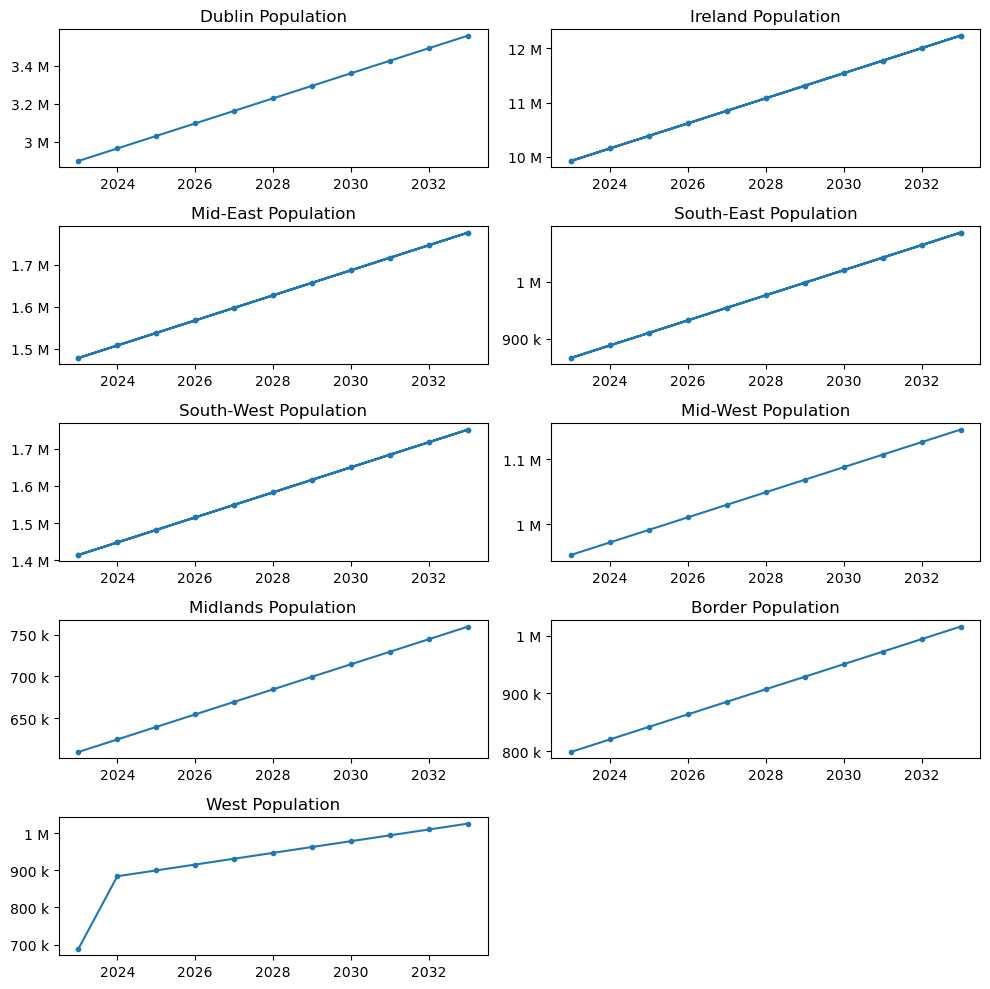

In [71]:
# Create a 2-column grid layout
gs = GridSpec(nrows=5, ncols=2)

# Create a figure
fig = plt.figure(figsize=(10, 10))

# Add subplots to the figure using the grid layout
axs = []
for i, region in enumerate(df_final['Region'].unique()):
    ax = fig.add_subplot(gs[i])
    axs.append(ax)

# Plot the graphs for each region
for i, region in enumerate(df_final['Region'].unique()):
    ax = axs[i]

    # Get the subset of the data frame for the current region
    df_region = df_final[df_final['Region'] == region]

    # Plot the graph for the current region
    ax.plot(df_region['Year'], df_region['Predicted Nr of Persons with Internet Access'],'.-', label=region)
    ax.set_title(f'{region} Population')

     #Set the Y axis scale to have readable format for numbers
    formatter = ticker.EngFormatter()
    ax.yaxis.set_major_formatter(formatter)
    
# Adjust the layout of the figure
fig.tight_layout()

# Show the plot
plt.show()